In [25]:
from gen_label_and_prob import act_tanh2, act_softmax, read_gray, resize_ndarray, minmax_normalize, find_crests, edge2positions, act_he, act_trough, read_npy
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt
from functools import partial
import cv2

In [26]:
root = "../../data/DiffuseMade10"
ann_suffix = ".npy"
ann_dir = osp.join(root, "combine_dir/train")
# name = "00000757"
# name = "00005581"
# name = "00005587"
name = "00000208"
# name = "00000028"

if ann_suffix == '.png':
    ann_reader = read_gray
else:
    ann_reader = read_npy

In [27]:
ann_path = os.path.join(ann_dir, f"{name}{ann_suffix}")
gray_ann = ann_reader(ann_path).astype(np.float32)
gray_ann = resize_ndarray(gray_ann, size=(512, 512), mode='bilinear')
prob = gray_ann / 255.0

In [28]:
def show_prob(prob):
    plt.imshow(prob, cmap="gray", vmin=0, vmax=1)
    plt.show()

th=5000

def show_hist(prob):
    hist, bin_edges = np.histogram(prob, bins=100, range=(0, 1))
    positions = edge2positions(bin_edges)
    crests, crest_positions = find_crests(hist, positions, window_size=0.2, is_trough=False, threshold=th)
    troughs, trough_positions = find_crests(hist, positions, window_size=0.2, is_trough=True, threshold=th)
    plt.stairs(hist, bin_edges)
    plt.scatter(crest_positions, crests)
    plt.scatter(trough_positions, troughs)
    plt.axhline(th)
    plt.show()


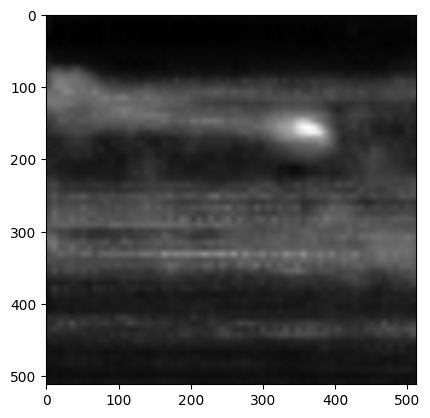

In [29]:
show_prob(prob)

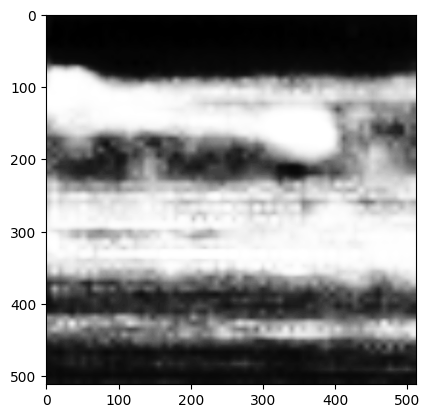

In [30]:
show_prob(act_he(prob))

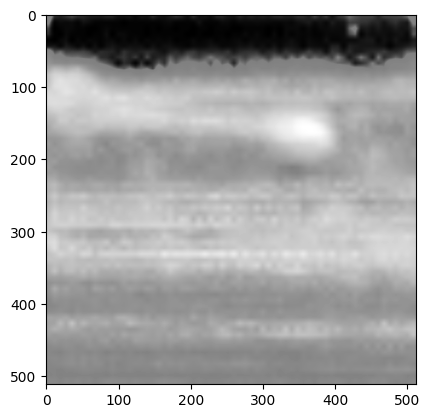

In [31]:
show_prob(act_trough(prob, sat=4.0, win_size=0.2, th=th))

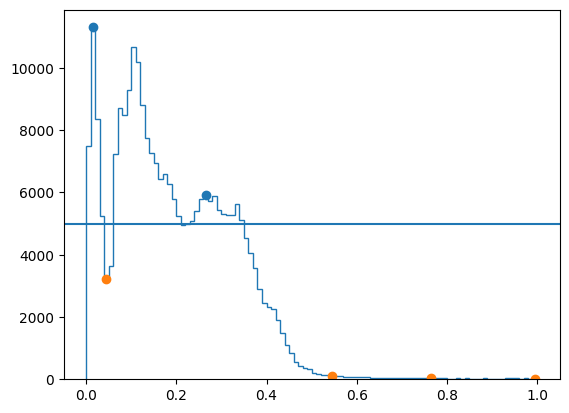

In [32]:
show_hist(prob)